# Question 4

## 4.1 Problem 4.1

### You have been provided an dataset of 99 different shapes KIMIA-99. The task is to find the align the remaining shapes based on the orientation of the given template shape.

In [9]:
import cv2
import numpy as np
import os

template_shape = cv2.imread('KIMIA dataset/bonefishes.png', cv2.IMREAD_GRAYSCALE)
shapes_dataset=[]
folder_path = 'KIMIA dataset'
for filename in os.listdir(folder_path):
    image_path = os.path.join(folder_path, filename)
    img = cv2.imread(image_path)
    if img is not None:
        shapes_dataset.append(img)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
import cv2
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

template_shape = cv2.imread('KIMIA dataset/fish30.png')

plt.figure(figsize=(3, 3))
plt.imshow(cv2.cvtColor(template_shape, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

_, binary_mask = cv2.threshold(template_shape, 1, 255, cv2.THRESH_BINARY)

black_pixel_coordinates_template = np.column_stack(np.where(binary_mask == 0))
pca = PCA(n_components=1)
pca.fit_transform(black_pixel_coordinates_template)

eig_1=pca.components_[0]

for second_image in shapes_dataset:

    _, binary_mask_second = cv2.threshold(second_image, 1, 255, cv2.THRESH_BINARY)

    black_pixel_coordinates_template_second = np.column_stack(np.where(binary_mask_second == 0))
    pca = PCA(n_components=1)
    pca.fit_transform(black_pixel_coordinates_template_second)

    eig_2=pca.components_[0]

    eig1_normalized = eig_1 / np.linalg.norm(eig_1)
    eig2_normalized = eig_2 / np.linalg.norm(eig_2)

    dot_product = np.dot(eig1_normalized, eig2_normalized)

    angle_radians = np.arccos(dot_product)

    angle_degrees = np.degrees(angle_radians)

    height, width = second_image.shape[:2]

    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), 180-angle_degrees, 1.0)

    rotated_image = cv2.warpAffine(second_image, rotation_matrix, (width, height))

    plt.figure(figsize=(3, 3))
    plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


## 4.3 Problem 4.3

### The data you will be given is in the form of an array, where each element, X, represents a point in the 2D color space. The data has been generated from 7 distinct Gaussian color components. The list of subtasks is given below. 

### • Find the likely color components which generate the dataset. 

### • Create a function which would take in an input of (number of components (an integer, n), means (an numpy array of shape (n, 2)), covariances (a numpy array of shape n, 2, 2)), and generates a sample dataset with the n likely components described by the above components.

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import pickle

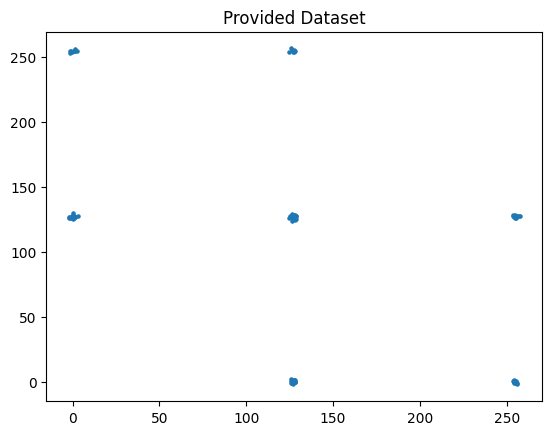

In [66]:
with open('SMAI-Dataset-problem-4.3/colors.pkl', 'rb') as file:
    data = pickle.load(file)

plt.scatter(data[:, 0], data[:, 1], s=5)
plt.title('Provided Dataset')
plt.show()

In [67]:
n_components = 7

gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm.fit(data)

estimated_means = gmm.means_
estimated_covariances = gmm.covariances_

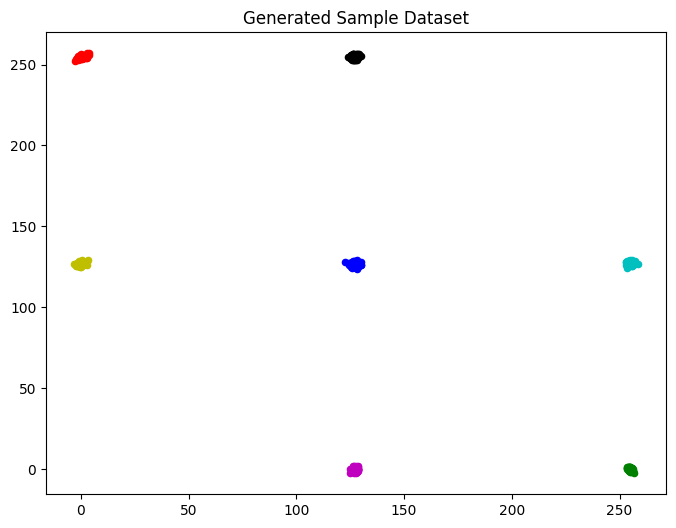

In [72]:
def generate_sample_dataset(n, means, covariances, num_samples=100):
    sample_data = np.zeros((n * num_samples, 2))
    
    for i in range(n):
        samples = np.random.multivariate_normal(means[i], covariances[i], num_samples)
        sample_data[i * num_samples:(i + 1) * num_samples, :] = samples
    
    return sample_data

num_samples=100
sample_dataset = generate_sample_dataset(n_components, estimated_means, estimated_covariances)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

plt.figure(figsize=(8, 6))
for i in range(n_components):
    cluster_data = sample_dataset[i * num_samples:(i + 1) * num_samples, :]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], s=20, label=f'Cluster {i + 1}', c=colors[i])

plt.title('Generated Sample Dataset')
plt.show()
